In [5]:
import pandas as pd 
df = pd.read_csv("P2Sample2.csv")
df.head

<bound method NDFrame.head of           Id  Hashtags:  terrorism  following  followers  \
0       3697        1.0        0.0     3319.0      611.0   
1      10740        0.0        0.0     4840.0     1724.0   
2       9572        0.0        0.0     4435.0    16041.0   
3      10963        0.0        0.0     9025.0    20165.0   
4       5401        2.0        0.0      780.0      897.0   
...      ...        ...        ...        ...        ...   
11963   2981        NaN        NaN        0.0        0.0   
11964  11954        NaN        NaN        0.0        0.0   
11965   7866        NaN        NaN        0.0        0.0   
11966   7841        NaN        NaN        0.0        0.0   
11967   6818        NaN        NaN        0.0        0.0   

      Reputation (Followers/ Followers + Following)  actions  is_retweet  \
0                                      0.1554707379    294.0         0.0   
1                                      0.2626447288   1522.0         0.0   
2                    

In [6]:
df.fillna(0)
df['Type'] = df['Type'].str.replace('Spam','1')
df['Type'] = df['Type'].str.replace('Quality','0')
df.drop(df.index[df['following'] == 'How to use it'], inplace=True)
df['Type'] = df['Type'].fillna(0)
df['Hashtags:'] = df['Hashtags:'].fillna(0)
df['terrorism'] = df['terrorism'].fillna(0)
df['following'] = df['following'].fillna(0)
df['actions'] = df['actions'].fillna(0)
df['is_retweet'] = df['is_retweet'].fillna(0)
df['followers'] = df['followers'].fillna(0)
df['Reputation (Followers/ Followers + Following)'] = df['Reputation (Followers/ Followers + Following)'].str.replace('#DIV/0!','0')


In [7]:
target = df.Type
inputs = df.drop('Type',axis='columns')

In [8]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [9]:
X = inputs
y = target

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, stratify=y,test_size=0.2)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [42]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [43]:
model.score(X_test, y_test)

0.9974937343358395

In [40]:
model = RandomForestClassifier(n_estimators=3)

In [44]:
y_predicted = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[1229,    2],
       [   4, 1159]], dtype=int64)

In [46]:
len(y_test)

2394

Text(69.0, 0.5, 'Truth')

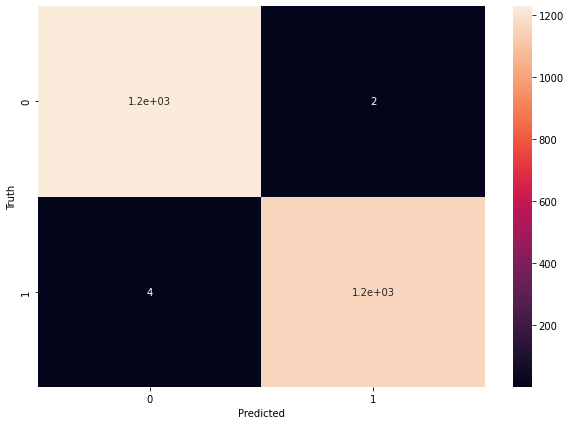

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
y_test[:15]

10587    0
11175    0
8603     0
8640     0
1        1
2461     1
8033     0
1579     1
836      1
2491     1
346      1
1438     1
11182    0
462      1
5705     1
Name: Type, dtype: object

In [49]:
y_predicted[:15]

array(['0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0',
       '1', '1'], dtype=object)